In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import_df = pd.read_excel('importation.xlsx')
price_df = pd.read_excel('price.xlsx')
slaughter_cow = pd.read_excel('slaughter_cow.xlsx')

# 데이터 불러오기

In [3]:
result_1 = pd.read_excel('result.xlsx')
result_1.head()

,year_month,importation,price,slaughter
0,200001,15869000,17558,121079
1,200002,16536000,18150,62486
2,200003,21996000,18032,74258
3,200004,18384000,16916,68224
4,200005,19097000,16780,90450


# 상관관계 분석

## 산점도로 표현

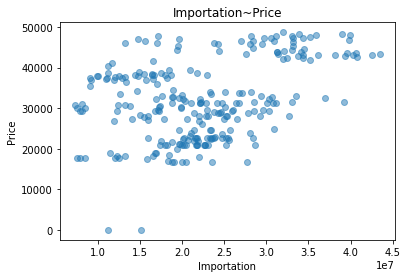

In [4]:
# 수입량(kg)과 가격(원/kg) 사이의 관계
data = result_1

W = result_1.year_month.values
X = result_1.importation.values
Y = result_1.price.values
Z = result_1.slaughter.values

plt.scatter(X,Y, alpha=0.5)
plt.title('Importation~Price')
plt.xlabel('Importation')
plt.ylabel('Price')
plt.show()

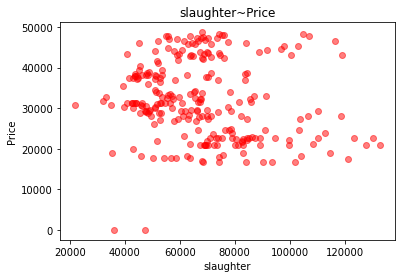

In [5]:
# 도축(마리수)과 가격(원/kg) 사이의 관계
plt.scatter(Z,Y, alpha=0.5, c= 'red')
plt.title('slaughter~Price')
plt.xlabel('slaughter')
plt.ylabel('Price')
plt.show()

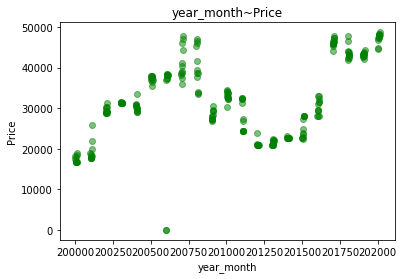

In [6]:
# 날짜과 가격(원/kg) 사이의 관계
plt.scatter(W,Y, alpha=0.5, c= 'green')
plt.title('year_month~Price')
plt.xlabel('year_month')
plt.ylabel('Price')
plt.show()

## 상관관계 계수 구하기
- -1.0 ~ -0.7 : 강력한 음적 선형관계
- -0.7 ~ -0.3 : 뚜렷한 음적 선형관계
- 0 : 관계없음
- 0.3 ~ 0.7 : 뚜렷한 양적 선형관계
- 0.7 ~ 1.0 : 강력한 양적 선형관계


### 수입량(kg)과 가격(kg/원)간의 상관관계 계수

In [7]:
# 방법1
cov = (np.sum(X*Y)-len(X)*np.mean(X)*np.mean(Y))/ len(X)
corr = cov/ (np.std(X) * np.std(Y))
corr

0.3853116013918798

In [8]:
# 방법2
np.corrcoef(X,Y)[0,1]

0.385311601391879

In [9]:
# 상관계수 검정 (p-value)
import scipy.stats as stats
stats.pearsonr(X,Y)
# p-value <0.05 이므로 상관계수는 유의미하다! 

(0.3853116013918791, 2.4135360578810985e-10)

### 도축(마리수)과 가격(kg/원)간의 상관관계 계수

In [10]:
# 방법1
cov = (np.sum(Z*Y)-len(Z)*np.mean(Z)*np.mean(Y))/ len(Z)
corr = cov/ (np.std(Z) * np.std(Y))
corr

-0.1547517675808398

In [11]:
# 방법2
np.corrcoef(Z,Y)[0,1]

-0.1547517675808401

In [12]:
# 상관계수 검정 ( p-value)
import scipy.stats as stats
stats.pearsonr(Z,Y)
# p-value <0.05 이므로 상관계수는 유의미하다! 

(-0.15475176758084025, 0.01392364449396446)

### 날짜와 가격간의 상관관계 계수

In [13]:
# 방법1
cov = (np.sum(W*Y)-len(W)*np.mean(W)*np.mean(Y))/len(W)
corr = cov/ (np.std(W) * np.std(Y))
corr

0.4426177882961127

In [14]:
# 방법2
np.corrcoef(W,Y)[0,1]

0.4426177882961127

In [15]:
# 상관계수 검정 ( p-value)
import scipy.stats as stats
stats.pearsonr(W,Y)
# p-value <0.05 이므로 상관계수는 유의미하다! 

(0.44261778829611265, 1.632100550278225e-13)

# 히트맵을 통한 상관관계 분석

In [16]:
data = result_1

In [17]:
corr_df = result_1.corr()
corr_df = corr_df.apply(lambda x: round(x,2))
corr_df

,year_month,importation,price,slaughter
year_month,1.00,0.69,0.44,0.36
importation,0.69,1.00,0.39,0.31
price,0.44,0.39,1.00,-0.15
slaughter,0.36,0.31,-0.15,1.00


In [18]:
s= corr_df.unstack()
s

year_month   year_month     1.00
             importation    0.69
             price          0.44
             slaughter      0.36
importation  year_month     0.69
             importation    1.00
             price          0.39
             slaughter      0.31
price        year_month     0.44
             importation    0.39
             price          1.00
             slaughter     -0.15
slaughter    year_month     0.36
             importation    0.31
             price         -0.15
             slaughter      1.00
dtype: float64

In [19]:
df = pd.DataFrame(s[s<1].sort_values(ascending=False),columns=['corr'])
df.style.background_gradient(cmap='viridis')

,,corr
year_month,importation,0.690000
importation,year_month,0.690000
year_month,price,0.440000
price,year_month,0.440000
importation,price,0.390000
price,importation,0.390000
year_month,slaughter,0.360000
slaughter,year_month,0.360000
importation,slaughter,0.310000
slaughter,importation,0.310000


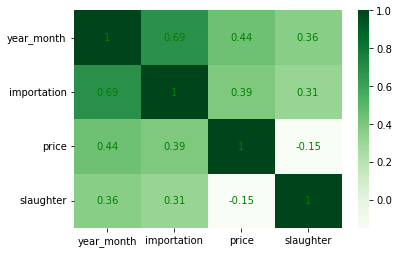

In [20]:
ax= sns.heatmap(corr_df, annot=True, annot_kws=dict(color='g'),cmap='Greens')
plt.show()